# Laplacian Associative Memory (LAM) - DEV 16

[Multiscale representations of community structures in attractor neural networks](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8412329/pdf/pcbi.1009296.pdf) (2021)

- End-to-End Encoding

In [1]:
from nn import LAM
import libtools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# np.random.seed(123)

---

#### LOAD DATA

In [4]:
src = np.load('../data/mat/SOM_orient_v1.npy')
src = libtools.downsample(src, 4)

print(src.shape)
print('Theta θ | min:', round(src.min(),4), 'max:', round(src.max(),4))

(51, 51)
Theta θ | min: 0.0012 max: 6.282


---

### HYPER-PARAMETERS

In [5]:
N = 8192                            # Neurons | Default: 30000
prob = 0.1                          # Sparsity
eta = 0.01                          # Epsilon / Learning rate
epochs = 3000                       # Steps
gamma = 0.6                         # Inhibition ratio
norm_mode = 'asym'                  # Asymmetric Normalisation
alpha = -0.9                        # Ratio between local and global inhibition
P = src.shape[0] * src.shape[1]     # N Nodes

# Init condition (Center cell)
start_node = int(int(src.shape[0]/2) * src.shape[1] + int(src.shape[0]/2))
print('Start node:', start_node)

Start node: 1300


---

### COMPUTE

In [6]:
sigmaX = 1.0
sigmaA = 0.1

W = libtools.construct_SOAM(src, sigmaX, sigmaA)

_, v = libtools.GL_eigen(W, 'asym')

graph = LAM(N, P, prob, W, gamma, "asym")
graph._set_weight(alpha)
m_log, obj_log = graph.simulate_single(alpha, eta, epochs, start_node)
m = m_log[-1,:]

100%|██████████| 3000/3000 [01:48<00:00, 27.56it/s]


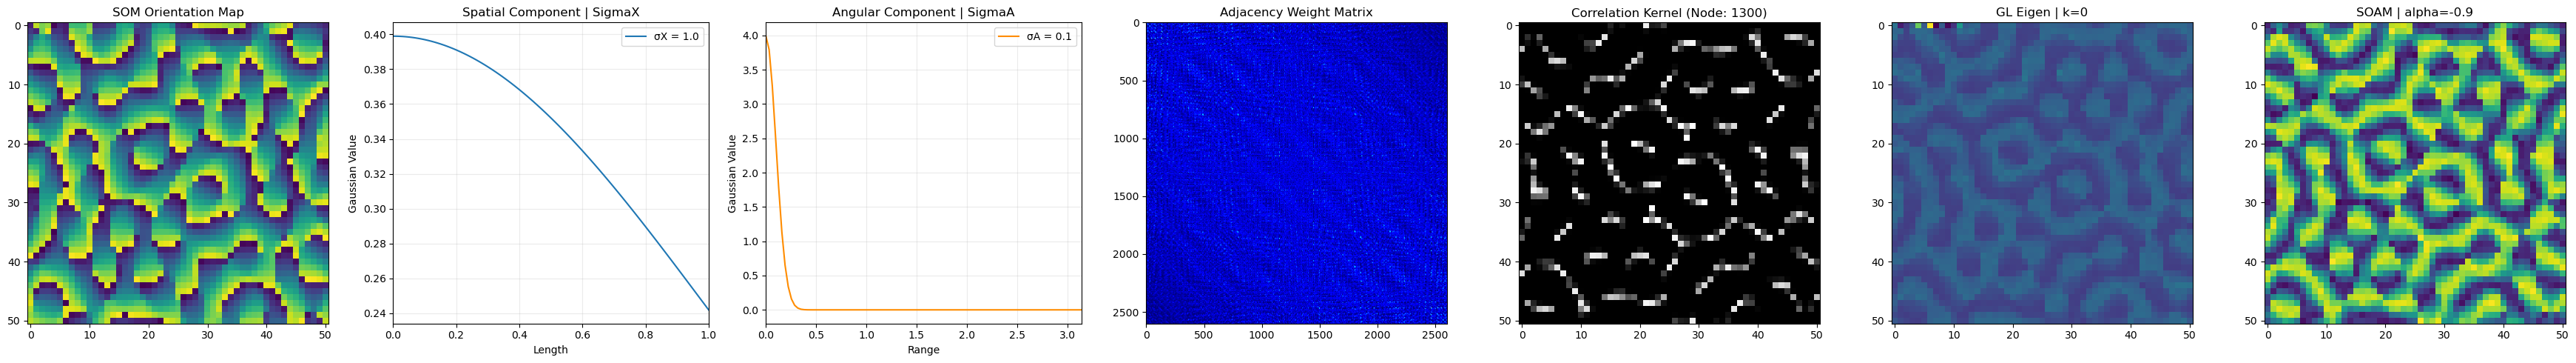

In [7]:
plt.figure(figsize=(35,5))
plt.subplot(1, 7, 1)
plt.imshow(src)
plt.title('SOM Orientation Map')

dist_s = np.linspace(0, 1, 100)
dist_a = np.linspace(0, np.pi, 100)

plt.subplot(1, 7, 2)
plt.plot(dist_s, libtools.gaussian(dist_s, sigmaX), label=f'σX = {sigmaX}')
plt.title('Spatial Component | SigmaX')
plt.xlabel('Length'), plt.ylabel('Gaussian Value')
plt.xlim([0, 1]), plt.grid(alpha=0.25), plt.legend()

plt.subplot(1, 7, 3)
plt.plot(dist_a, libtools.gaussian(dist_a, sigmaA), 'darkorange', label=f'σA = {sigmaA}')
plt.title('Angular Component | SigmaA')
plt.xlabel('Range'), plt.ylabel('Gaussian Value')
plt.xlim([0, np.pi]), plt.grid(alpha=0.25), plt.legend()

plt.subplot(1, 7, 4)
plt.imshow(W, 'jet')
plt.title('Adjacency Weight Matrix')

plt.subplot(1, 7, 5)
plt.imshow(W[start_node].reshape(src.shape), 'gray')
plt.title('Correlation Kernel (Node: ' + str(start_node) + ')')

plt.subplot(1, 7, 6)
k = 0
plt.imshow(v[:,k].reshape(src.shape), vmin=np.min(v[:,k]), vmax=np.max(v[:,k]))
plt.title('GL Eigen | k='+ str(k))

plt.subplot(1, 7, 7)
plt.imshow(m.reshape(src.shape), vmin=np.min(m), vmax=np.max(m))
plt.title('SOAM | alpha=' + str(alpha)), plt.tight_layout()

plt.tight_layout()